In [14]:
# 1. 导入库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']

In [15]:
# 2. 带入数据
df = pd.read_excel('beer.xlsx')

In [16]:
# 3. 数据概览
print('数据总数:',len(df))
print('列数:',len(df.columns))
# df.head(5)

数据总数: 1989
列数: 31


In [17]:
# 4. 数据清洗
# 删除无用的列
columns = ['关闭人','关闭日期','关闭金额',
           '卫星客户编码','卫星客户名称',
           '分管区域','事业部','年度','月份',
           '费用来源','在审报销','活动类别','产品线','方案内容']
test = df.drop(columns=columns)
print(len(test.columns))
test.columns

17


Index(['方案号', '方案序号', '制单人', '制单日期', '城市单元', '办事处', '费用项目', '支付方式', '业务类别',
       '预算编号', '审批金额', '终审报销', '报销余额', '客户编码', '客户名称', '终审人', '终审日期'],
      dtype='object')

In [18]:
# 检测缺失值
test.isna().sum()
# 删除缺失值
test.dropna(inplace=True)

In [19]:
# 检测重复值
df.duplicated().sum()
# 删除重复数据
df.drop_duplicates(inplace=True)
# len(test)

In [20]:
test['方案号']=test['方案号'].str.replace('202304','')
test.head(5)

,方案号,方案序号,制单人,制单日期,城市单元,办事处,费用项目,支付方式,业务类别,预算编号,审批金额,终审报销,报销余额,客户编码,客户名称,终审人,终审日期
0,FA0032023059519,1,王静,2023-05-31,青花郎杭州市区团购一部,青花郎浙江办事处,联盟商费用,经销商垫付-F类,H,YS2307351,44216.0,19081.0,14081.0,617129,浙江郎鸿商贸有限公司,朱舫铭,2023-05-31
1,FA0032023059545,1,季京冉,2023-05-31,青花郎菏泽,青花郎济南办事处,藏品品鉴,公司直付酒,H,YS2312423,57576.0,11995.0,45581.0,90505,菏泽市梓源酒水有限公司,殷秀功,2023-06-01
2,FA0032023059195,2,季京冉,2023-05-31,青花郎菏泽,青花郎济南办事处,商家品鉴,公司直付酒,H,YS2305773,40860.0,34504.0,6356.0,90505,菏泽市梓源酒水有限公司,刘行,2023-05-31
4,FA0032023059319,2,刘鹏程,2023-05-31,青花郎杭州郊县,青花郎浙江办事处,其他,经销商垫付-F类,H,YS2307010,61540.0,60540.0,1000.0,617129,浙江郎鸿商贸有限公司,易明亮,2023-05-31
5,FA0032023059317,2,刘鹏程,2023-05-31,青花郎杭州郊县,青花郎浙江办事处,其他,经销商垫付-F类,H,YS2307010,30770.0,30270.0,500.0,617129,浙江郎鸿商贸有限公司,易明亮,2023-06-01


In [21]:
# test['支付方式']=test['支付方式'].astype('category')
test['业务类别'].value_counts()
# test.info()

业务类别
H        1040
JD099     192
FA054      95
FA042      68
FA052      30
FA011      28
FA059       1
Name: count, dtype: int64

In [22]:
# 5. 新数据特征构造
x=pd.cut(test['报销余额'],bins=3,labels=['少','一般','多'])
x.value_counts()

报销余额
少     1438
一般      10
多        6
Name: count, dtype: int64

<Axes: >

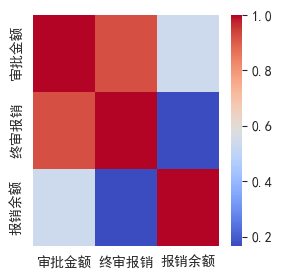

In [27]:
# 6. 可视化
a=test[['审批金额','终审报销','报销余额']].corr()
plt.figure(figsize=(3,3))
sns.heatmap(a,cmap='coolwarm')

(array([1.174e+03, 1.660e+02, 5.400e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.0100000e+02, 1.2616750e+04, 2.5132500e+04, 3.7648250e+04,
        5.0164000e+04, 6.2679750e+04, 7.5195500e+04, 8.7711250e+04,
        1.0022700e+05, 1.1274275e+05, 1.2525850e+05, 1.3777425e+05,
        1.5029000e+05, 1.6280575e+05, 1.7532150e+05, 1.8783725e+05,
        2.0035300e+05, 2.1286875e+05, 2.2538450e+05, 2.3790025e+05,
        2.5041600e+05]),
 <BarContainer object of 20 artists>)

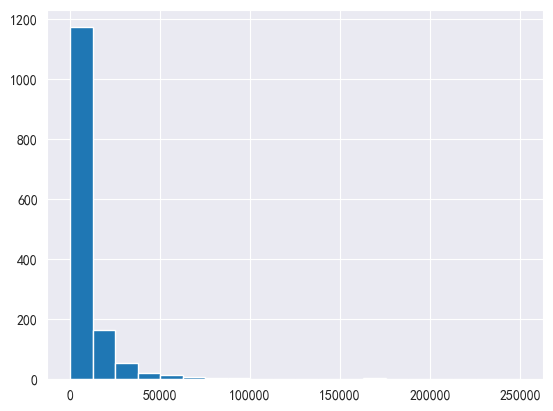

In [24]:
# 直方图
plt.subplot(111)
plt.hist(test['报销余额'],bins=20)

<Axes: xlabel='报销余额', ylabel='Count'>

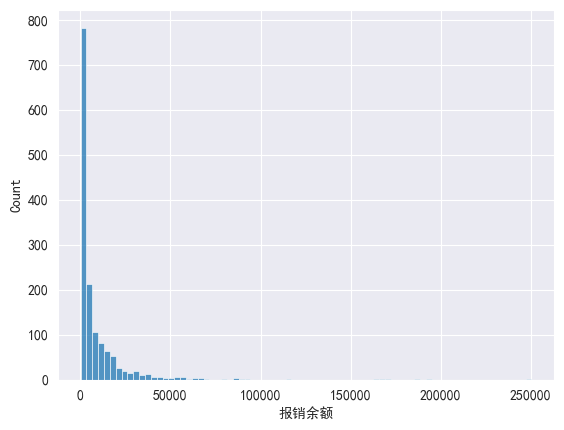

In [25]:
sns.histplot(data=test,x='报销余额',kde=False)